This Jupyter Notebook calculates the Relative Strength Index of a stock, BAE Systems in this example, and plots it along with overbought and oversold threshold lines.

In [1]:
# Import required modules
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mfp
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import stock data
start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)
pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474178
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474178
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975018
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390701
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806396
...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976


In [3]:
#need to set the index of the dataframe to an integer for the loop below
pdr_bae_data.reset_index(inplace=True)

In [4]:
#Calculate RSI using method from the below webpage:
#https://www.omnicalculator.com/finance/rsi#:~:text=Calculate%20relative%20strength%20(RS)%20by,1%20%2D%20RS)%20from%20100.

#Set RSI period, 'x'
x = 14
up_tot = 0
down_tot = 0

pdr_bae_data['Day_Delta'] = pdr_bae_data['Close'] - pdr_bae_data['Close'].shift(+1)

pdr_bae_data['Gains'] = np.where(pdr_bae_data['Day_Delta'] > 0,pdr_bae_data['Day_Delta'],0)
pdr_bae_data['Losses'] = np.where(pdr_bae_data['Day_Delta'] < 0,-pdr_bae_data['Day_Delta'],0)

#Determine initial RSI
for df_pos in range(1,x+1): #Range is 1 to x+1 as the first row is skipped as Day_Delta is NaN
    up_tot = up_tot + pdr_bae_data.loc[df_pos, 'Gains']
    down_tot = down_tot + pdr_bae_data.loc[df_pos, 'Losses']
    
pdr_bae_data.loc[x, 'Avg_Gains'] = up_tot/x
pdr_bae_data.loc[x, 'Avg_Losses'] = down_tot/x
pdr_bae_data.loc[x, 'RS'] = pdr_bae_data.loc[x, 'Avg_Gains'] / pdr_bae_data.loc[x, 'Avg_Losses']
pdr_bae_data.loc[x,'RSI'] = 100 - 100/(1+pdr_bae_data.loc[x, 'RS'])

#Determine the rest of the RSI values
for df_pos in range(x+1,len(pdr_bae_data)):
    pdr_bae_data.loc[df_pos, 'Avg_Gains'] = (pdr_bae_data.loc[df_pos-1, 'Avg_Gains']*13 + pdr_bae_data.loc[df_pos, 'Gains'])/x
    pdr_bae_data.loc[df_pos, 'Avg_Losses'] = (pdr_bae_data.loc[df_pos-1, 'Avg_Losses']*13+pdr_bae_data.loc[df_pos, 'Losses'])/x
    pdr_bae_data.loc[df_pos, 'RS'] = pdr_bae_data.loc[df_pos, 'Avg_Gains'] / pdr_bae_data.loc[df_pos, 'Avg_Losses']
    pdr_bae_data.loc[df_pos,'RSI'] = 100 - 100/(1+pdr_bae_data.loc[df_pos, 'RS'])

pdr_bae_data[['Date','Close','Day_Delta','Gains','Losses','Avg_Gains','Avg_Losses','RS','RSI']].tail()

,Date,Close,Day_Delta,Gains,Losses,Avg_Gains,Avg_Losses,RS,RSI
8710,2022-05-26,771.000000,6.200012,6.200012,0.000000,4.653753,3.064814,1.518446,60.292968
8711,2022-05-27,766.799988,-4.200012,0.000000,4.200012,4.321343,3.145900,1.373643,57.870662
8712,2022-05-30,761.599976,-5.200012,0.000000,5.200012,4.012675,3.292622,1.218687,54.928295
8713,2022-05-31,756.000000,-5.599976,0.000000,5.599976,3.726056,3.457433,1.077694,51.869722
8714,2022-06-01,778.200012,22.200012,22.200012,0.000000,5.045624,3.210474,1.571614,61.113909


In [5]:
#Need to reset the index to the date for the graph to work properly
pdr_bae_data.set_index('Date',inplace=True)

In [6]:
#Set overbought and oversold thresholds
pdr_bae_data['Overbought'] = 70
pdr_bae_data['Oversold'] = 30

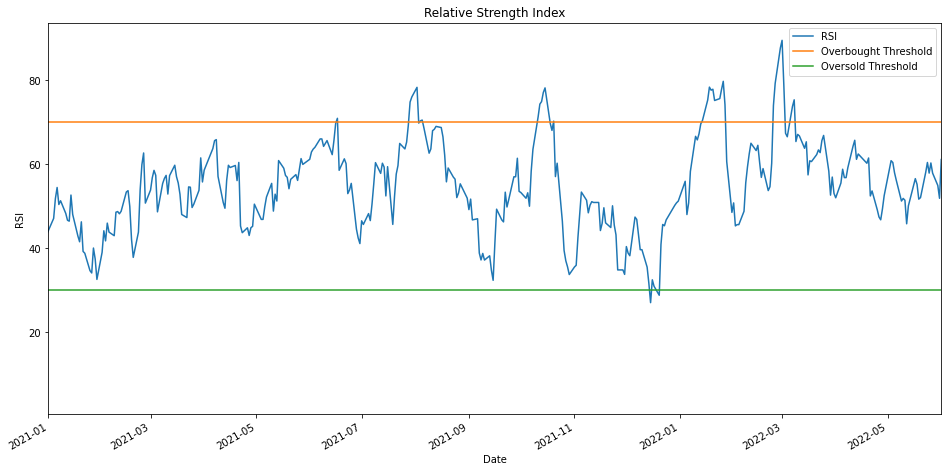

In [7]:
#Plot RSI with overbought and oversold lines
pdr_bae_data['RSI'].plot(label='RSI',figsize=(16,8))
pdr_bae_data['Overbought'].plot(label='Overbought Threshold')
pdr_bae_data['Oversold'].plot(label='Oversold Threshold')

_=plt.xlabel('Date')
_=plt.ylabel('RSI')
_=plt.title('Relative Strength Index')
plt.xlim(datetime(2021,1,1),end) #set the start of the graph to start of 2021 so it is legible
plt.legend();